In [1]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex4 import *

/tmp/ipykernel_18/1500229236.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('../input/dl-course-data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

2025-10-03 21:03:06.767992: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-03 21:03:06.768140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-03 21:03:06.922242: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Input shape: [18]


Minimum Validation Loss: 0.1985


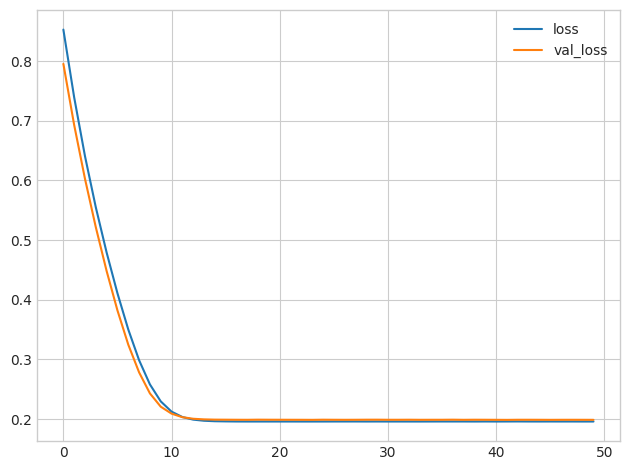

In [3]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.1985


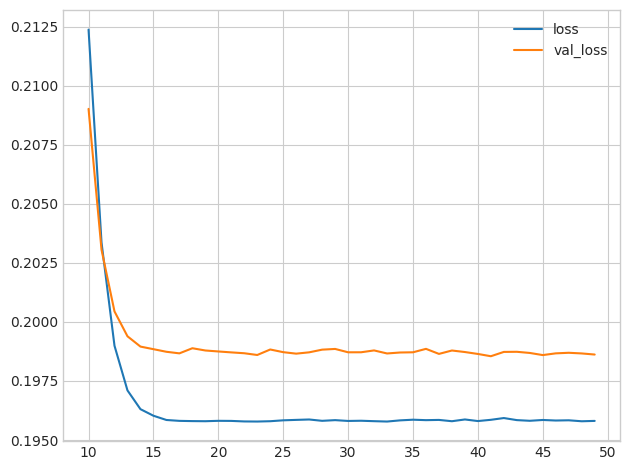

In [4]:
# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Epoch 1/50
48/48 [==============================] - 1s 7ms/step - loss: 0.2213 - val_loss: 0.2083
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1987 - val_loss: 0.2035
Epoch 3/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1941 - val_loss: 0.2016
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1915 - val_loss: 0.2024
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1907 - val_loss: 0.1993
Epoch 6/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1883 - val_loss: 0.1997
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1873 - val_loss: 0.1993
Epoch 8/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1864 - val_loss: 0.1983
Epoch 9/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1852 - val_loss: 0.1987
Epoch 10/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1842 - val_loss: 0.1992
Epoch 11/50
48/48 [

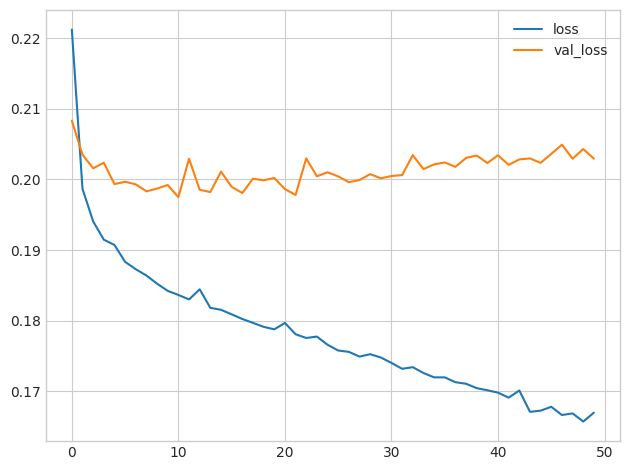

In [5]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [6]:
from tensorflow.keras import callbacks

# YOUR CODE HERE: define an early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/50
48/48 [==============================] - 1s 7ms/step - loss: 0.2375 - val_loss: 0.2095
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 0.2021 - val_loss: 0.2050
Epoch 3/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1963 - val_loss: 0.2030
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1936 - val_loss: 0.2011
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1910 - val_loss: 0.2000
Epoch 6/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1894 - val_loss: 0.1989
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1880 - val_loss: 0.1992
Epoch 8/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1869 - val_loss: 0.1992
Epoch 9/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1856 - val_loss: 0.1996
Epoch 10/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1850 - val_loss: 0.1991
Epoch 11/50
48/48 [

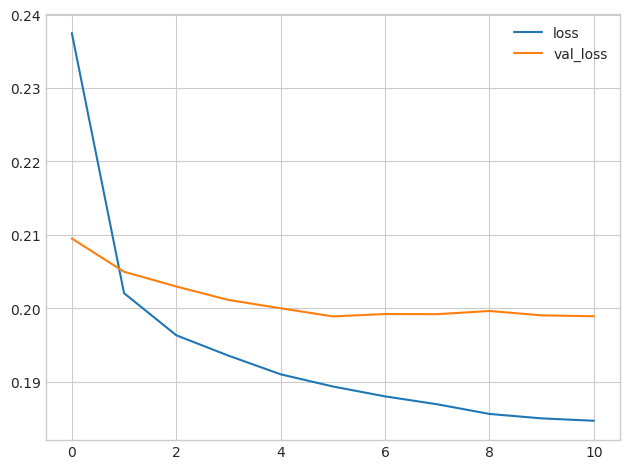

In [7]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));